In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score

In [2]:
#loading datasets
traindf = pd.read_csv("/kaggle/input/playground-series-s4e1/train.csv")
testdf = pd.read_csv("/kaggle/input/playground-series-s4e1/test.csv")
sampledf = pd.read_csv("/kaggle/input/playground-series-s4e1/sample_submission.csv")

## **Data Inspection**

In [3]:
#inspecting train dataset
traindf.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
#inspecting test dataset
testdf.head(5)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [5]:
#train dataset shape
traindf.shape

(165034, 14)

In [6]:
#test dataset shape
testdf.shape

(110023, 13)

In [7]:
#train dataset column info
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
#train dataset column info
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [9]:
#inspecting how to submit
sampledf.head(5)

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


## **Exploratory Data Analysis**

In [10]:
#checking for null values -> train dataset
traindf.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#checking for null values -> test dataset
testdf.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [12]:
#checking for duplicates -> train dataset
traindf.duplicated().sum()

0

In [13]:
#checking for duplicates -> test dataset
testdf.duplicated().sum()

0

In [14]:
#inspecting the target value
exited_unique = traindf['Exited'].value_counts()
exited_unique

Exited
0    130113
1     34921
Name: count, dtype: int64

In [15]:
#dissecting the dataset
churn_df = traindf[traindf['Exited'] == 1]
nonchurn_df = traindf[traindf['Exited'] == 0]

### **Age**
*How does the age distribution compare between churned and non-churned groups?*

In [16]:
average_age_churned = churn_df['Age'].mean()
average_age_nonchurn = nonchurn_df['Age'].mean()

print("Average age of churned customers:", round(average_age_churned,2))
print("Average age of non-churn customers:", round(average_age_nonchurn,2))

if average_age_churned > average_age_nonchurn:
    print("==> The average age of churned customers is higher than that of the non-churn customers.")
elif average_age_churned < average_age_nonchurn:
    print("==> The average age of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average age of churned customers is equal to the average age of non-churn customers.")

Average age of churned customers: 43.96
Average age of non-churn customers: 36.56
==> The average age of churned customers is higher than that of the non-churn customers.


### **Credit Score**
*How does the distribution of credit scores differ between churned and non-churned customers?*

In [17]:
average_creditscore_churned = churn_df['CreditScore'].mean()
average_creditscore_nonchurn = nonchurn_df['CreditScore'].mean()

print("Average CreditScore of churned customers:", round(average_creditscore_churned,2))
print("Average CreditScore of non-churn customers:", round(average_creditscore_nonchurn,2))

if average_creditscore_churned > average_creditscore_nonchurn:
    print("==> The average CreditScore of churned customers is higher than that of the non-churn customers.")
elif average_creditscore_churned < average_creditscore_nonchurn:
    print("==> The average CreditScore of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average CreditScore of churned customers is equal to the average age of non-churn customers.")

Average CreditScore of churned customers: 652.22
Average CreditScore of non-churn customers: 657.59
==> The average CreditScore of non-churn customers is higher than that of the churned customers.


### **Account Balance**
*How does the distribution of account balances differ between churned and non-churned customers?*

In [18]:
average_accountbalance_churned = churn_df['Balance'].mean()
average_accountbalance_nonchurn = nonchurn_df['Balance'].mean()

print("Average AccountBalance of churned customers:", round(average_accountbalance_churned,2))
print("Average AccountBalance of non-churn customers:", round(average_accountbalance_nonchurn,2))

if average_accountbalance_churned > average_accountbalance_nonchurn:
    print("==> The average AccountBalance of churned customers is higher than that of the non-churn customers.")
elif average_accountbalance_churned < average_accountbalance_nonchurn:
    print("==> The average AccountBalance of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average AccountBalance of churned customers is equal to the average age of non-churn customers.")

Average AccountBalance of churned customers: 71209.98
Average AccountBalance of non-churn customers: 51255.81
==> The average AccountBalance of churned customers is higher than that of the non-churn customers.


### **Estimated Salary**
*Is there a discernible pattern in the distribution of estimated salaries between churned and non-churned customers?*

In [19]:
average_estimatedsalary_churned = churn_df['EstimatedSalary'].mean()
average_estimatedsalary_nonchurn = nonchurn_df['EstimatedSalary'].mean()

print("Average EstimatedSalary of churned customers:", round(average_estimatedsalary_churned,2))
print("Average EstimatedSalary of non-churn customers:", round(average_estimatedsalary_nonchurn,2))

if average_estimatedsalary_churned > average_estimatedsalary_nonchurn:
    print("==> The average EstimatedSalary of churned customers is higher than that of the non-churn customers.")
elif average_estimatedsalary_churned < average_estimatedsalary_nonchurn:
    print("==> The average EstimatedSalary of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average EstimatedSalary of churned customers is equal to the average age of non-churn customers.")

Average EstimatedSalary of churned customers: 114402.5
Average EstimatedSalary of non-churn customers: 112084.29
==> The average EstimatedSalary of churned customers is higher than that of the non-churn customers.


### **Tenure**
*What is the relationship between tenure and churn status?*

In [20]:
average_tenure_churned = churn_df['Tenure'].mean()
average_tenure_nonchurn = nonchurn_df['Tenure'].mean()

print("Average Tenure of churned customers:", round(average_tenure_churned,2))
print("Average Tenure of non-churn customers:", round(average_tenure_nonchurn,2))

if average_tenure_churned > average_tenure_nonchurn:
    print("==> The average Tenure of churned customers is higher than that of the non-churn customers.")
elif average_tenure_churned < average_tenure_nonchurn:
    print("==> The average Tenure of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average Tenure of churned customers is equal to the average age of non-churn customers.")

Average Tenure of churned customers: 4.91
Average Tenure of non-churn customers: 5.05
==> The average Tenure of non-churn customers is higher than that of the churned customers.


### **Number of Bank products**
*Is there a significant difference in the average number of bank products used by churned and non-churned customers?*

In [21]:
average_products_churned = churn_df['NumOfProducts'].mean()
average_products_nonchurn = nonchurn_df['NumOfProducts'].mean()

print("Average Number_of_BankProducts of churned customers:", round(average_products_churned,2))
print("Average Number_of_BankProducts of non-churn customers:", round(average_products_nonchurn,2))

if average_products_churned > average_products_nonchurn:
    print("==> The average Number_of_BankProducts of churned customers is higher than that of the non-churn customers.")
elif average_products_churned < average_products_nonchurn:
    print("==> The average Number_of_BankProducts of non-churn customers is higher than that of the churned customers.")
else:
    print("==> The average Number_of_BankProducts of churned customers is equal to the average age of non-churn customers.")

Average Number_of_BankProducts of churned customers: 1.33
Average Number_of_BankProducts of non-churn customers: 1.62
==> The average Number_of_BankProducts of non-churn customers is higher than that of the churned customers.


### **Has a CreditCard**
*Is there a significant disparity in credit card ownership between the two groups?*

In [22]:
count_hascrcard_churned = (churn_df['HasCrCard'] == 1).sum()
count_hascrcard_nonchurn = (churn_df['HasCrCard'] == 0).sum()

print("Number of churned customers with CreditCard:", count_hascrcard_churned)
print("Number of non-churn customers with CreditCard:", count_hascrcard_nonchurn)

if count_hascrcard_churned > count_hascrcard_nonchurn:
    print("==> Number of churned customers with CreditCard is higher than that of the non-churn customers.")
elif count_hascrcard_churned < count_hascrcard_nonchurn:
    print("==> Number of non-churn customers with CreditCard is higher than that of the churned customers.")
else:
    print("==> Number of churned customers with CreditCard is equal to the average age of non-churn customers.")

Number of churned customers with CreditCard: 25686
Number of non-churn customers with CreditCard: 9235
==> Number of churned customers with CreditCard is higher than that of the non-churn customers.


### **Active Member**
*Are inactive customers more likely to churn, as suggested by the data?*

In [23]:
count_activemember_churned = (churn_df['IsActiveMember'] == 1).sum()
count_activemember_nonchurn = (churn_df['IsActiveMember'] == 0).sum()

print("Number of churned customers who are active:", count_activemember_churned)
print("Number of non-churn customers who are active:", count_activemember_nonchurn)

if count_activemember_churned > count_activemember_nonchurn:
    print("==> Number of churned customers who are active is higher than that of the non-churn customers.")
elif count_activemember_churned < count_activemember_nonchurn:
    print("==> Number of non-churn customers who are active is higher than that of the churned customers.")
else:
    print("==> Number of churned customers who are active is equal to the average age of non-churn customers.")

Number of churned customers who are active: 10297
Number of non-churn customers who are active: 24624
==> Number of non-churn customers who are active is higher than that of the churned customers.


In [24]:
#inspecting the "Geogrpahy" categorical feature
traindf['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

### **Churned Customers Vs Gender and Country**

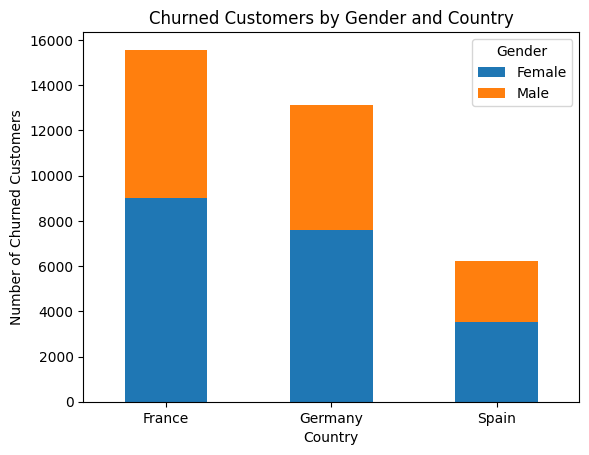

In [25]:
churn_by_country_gender = churn_df.groupby(['Geography', 'Gender']).size().unstack()

churn_by_country_gender.plot(kind='bar', stacked=True)
plt.title('Churned Customers by Gender and Country')
plt.xlabel('Country')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

### **Estimated Salary Vs Gender**

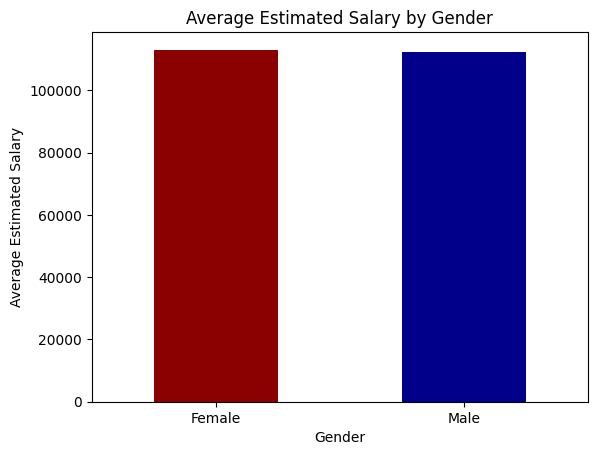

In [26]:
avg_salary_by_gender = traindf.groupby('Gender')['EstimatedSalary'].mean()

avg_salary_by_gender.plot(kind='bar', color=['darkred', 'darkblue'])
plt.title('Average Estimated Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Estimated Salary')
plt.xticks(rotation=0)
plt.show()

### **Active Members Vs Gender**

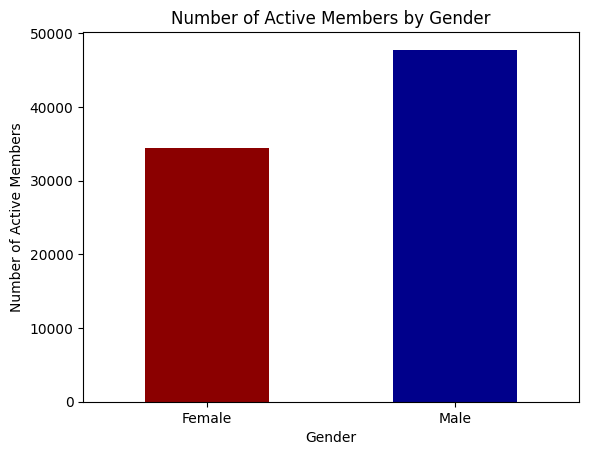

In [27]:
active_members_by_gender = traindf.groupby('Gender')['IsActiveMember'].sum()

active_members_by_gender.plot(kind='bar', color=['darkred', 'darkblue'])
plt.title('Number of Active Members by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Active Members')
plt.xticks(rotation=0)
plt.show()

### **Credit Cards Vs Gender**

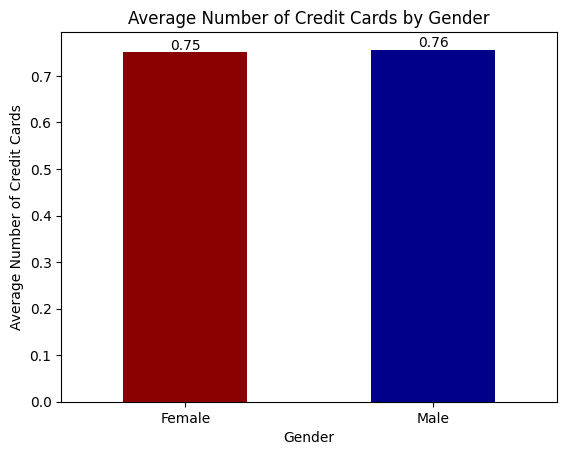

In [28]:
avg_credit_cards_by_gender = traindf.groupby('Gender')['HasCrCard'].mean()

ax = avg_credit_cards_by_gender.plot(kind='bar', color=['darkred', 'darkblue'])
plt.title('Average Number of Credit Cards by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Number of Credit Cards')
plt.xticks(rotation=0)

for i, val in enumerate(avg_credit_cards_by_gender):
    ax.text(i, val, str(round(val, 2)), ha='center', va='bottom')
    
plt.show()

### **Age Vs Gender**

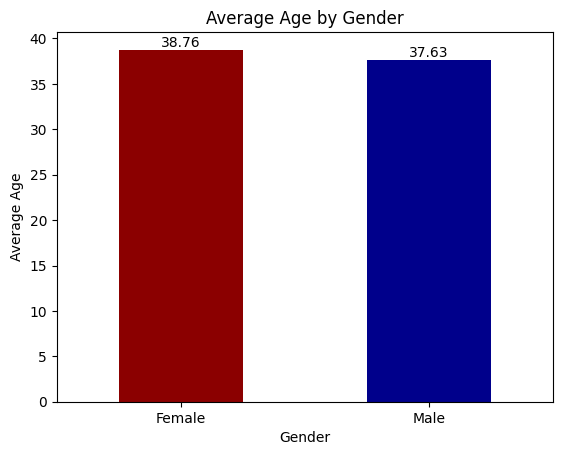

In [29]:
avg_age_by_gender = traindf.groupby('Gender')['Age'].mean()

ax = avg_age_by_gender.plot(kind='bar', color=['darkred', 'darkblue'])
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.xticks(rotation=0)

for i, val in enumerate(avg_age_by_gender):
    ax.text(i, val, str(round(val, 2)), ha='center', va='bottom')
    
plt.show()

## **Feature Engineering**

In [30]:
#interaction features
traindf['Balance_Products'] = traindf['Balance'] * traindf['NumOfProducts']
traindf['Tenure_Age_Ratio'] = traindf['Tenure'] / traindf['Age']

In [31]:
testdf['Balance_Products'] = testdf['Balance'] * testdf['NumOfProducts']
testdf['Tenure_Age_Ratio'] = testdf['Tenure'] / testdf['Age']

In [32]:
#creditscore and age binning age
bins = [0, 30, 40, 50, 60, float('inf')]
labels = ['0-30', '31-40', '41-50', '51-60', '60+']
traindf['Age_Binned'] = pd.cut(traindf['Age'], bins=bins, labels=labels)

bins = [0, 500, 600, 700, 800, float('inf')]
labels = ['0-500', '501-600', '601-700', '701-800', '800+']
traindf['CreditScore_Binned'] = pd.cut(traindf['CreditScore'], bins=bins, labels=labels)

In [33]:
#irrelevant columns
traindf = traindf.drop(columns=['id', 'CustomerId', 'Surname'])

In [34]:
#separating target variables
X = traindf.drop("Exited", axis=1)
y = traindf["Exited"]

In [35]:
#numerical and categorical features
numeric = X.select_dtypes(include=['int64', 'float64']).columns
categorical = X.select_dtypes(include=['object']).columns

In [36]:
#transformer for numerical and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [37]:
#combining the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ])

In [38]:
#pipeline with the regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

In [39]:
#splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Balance_Products',
       'Tenure_Age_Ratio'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [41]:
#evaluating using ROC AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8318016623943949


In [42]:
#predictions on test set
test_predicts = model.predict_proba(testdf)[:, 1]

In [43]:
#submission file
finaldf = pd.DataFrame({'id': testdf['id'], 'Exited': test_predicts})
finaldf

,id,Exited
0,165034,0.018308
1,165035,0.665839
2,165036,0.109740
3,165037,0.281178
4,165038,0.366342
...,...,...
110018,275052,0.028644
110019,275053,0.072031
110020,275054,0.046921
110021,275055,0.144852


In [44]:
finaldf.to_csv('submission.csv', index=False)